<a href="https://colab.research.google.com/github/Topsan2002/Artificial-Intelligence/blob/main/CNN_Alphan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle

In [2]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

# Then move kaggle.json into the folder where the API expects to find it.
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 62 bytes


In [3]:
!kaggle datasets download -d ruslanbredun/sign-language-eng-alphabet

100% 1.45G/1.45G [00:16<00:00, 131MB/s]
100% 1.45G/1.45G [00:16<00:00, 96.8MB/s]


In [5]:
import zipfile
zip_ref = zipfile.ZipFile('sign-language-eng-alphabet.zip', 'r')
zip_ref.extractall('/content/input')
zip_ref.close()

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
sns.set_style('darkgrid')
# import cv2
import itertools

import tensorflow as tf
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation,Dropout
from keras.models import Model, Sequential
# from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from sklearn.metrics import confusion_matrix,classification_report
import imageio
import matplotlib.image as img

import os
import pathlib

import warnings
warnings.filterwarnings('ignore')
from tensorflow.keras.applications import imagenet_utils

In [7]:
train_gen=ImageDataGenerator(rescale=1./255,validation_split=0.2)
train_data=train_gen.flow_from_directory("/content/input/Images",target_size=(224,224),batch_size=32,class_mode='categorical',shuffle=True,subset='training')
test_data=train_gen.flow_from_directory("/content/input/Images",target_size=(224,224),batch_size=1,shuffle=False,subset='validation')

Found 19200 images belonging to 24 classes.
Found 4800 images belonging to 24 classes.


In [10]:
cnn=keras.models.Sequential()
cnn.add(keras.layers.Conv2D(filters=32,kernel_size=3,
                            padding='valid',activation='relu',input_shape=(224,224,3)))
cnn.add(keras.layers.MaxPool2D(pool_size=2,strides=2))
cnn.add(keras.layers.Flatten())
cnn.add(keras.layers.Dense(40,activation='relu'))
cnn.add(keras.layers.Dropout(rate= 0.1, seed= 100))
cnn.add(keras.layers.Dense(units=24,activation='sigmoid'))
cnn.compile(optimizer='adam',metrics=['accuracy'],loss='categorical_crossentropy')
cnn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 111, 111, 32)      0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 394272)            0         
                                                                 
 dense_4 (Dense)             (None, 40)                15770920  
                                                                 
 dropout_2 (Dropout)         (None, 40)                0         
                                                                 
 dense_5 (Dense)             (None, 24)                984       
                                                      

In [12]:
cnn.fit(train_data,epochs=10,validation_data=test_data,shuffle=True)

Epoch 1/10
600/600 [==============================] - 72s 119ms/step - loss: 1.5880 - accuracy: 0.4672 - val_loss: 1.5918 - val_accuracy: 0.4921
Epoch 2/10
600/600 [==============================] - 74s 123ms/step - loss: 1.4311 - accuracy: 0.5272 - val_loss: 1.4515 - val_accuracy: 0.4983
Epoch 3/10
600/600 [==============================] - 72s 120ms/step - loss: 1.0246 - accuracy: 0.6817 - val_loss: 0.9506 - val_accuracy: 0.7785
Epoch 4/10
600/600 [==============================] - 73s 122ms/step - loss: 0.6221 - accuracy: 0.7919 - val_loss: 0.6894 - val_accuracy: 0.8285
Epoch 5/10
600/600 [==============================] - 71s 119ms/step - loss: 0.4781 - accuracy: 0.8404 - val_loss: 0.8098 - val_accuracy: 0.8058
Epoch 6/10
600/600 [==============================] - 71s 118ms/step - loss: 0.4032 - accuracy: 0.8773 - val_loss: 0.5805 - val_accuracy: 0.8333
Epoch 7/10
600/600 [==============================] - 72s 120ms/step - loss: 0.3794 - accuracy: 0.8887 - val_loss: 0.5749 - val_ac

In [13]:
def plot(c):
    plt.plot(c.history.history['accuracy'],marker='o',color='red',markersize=10)
    plt.plot(c.history.history['val_accuracy'],marker='*',color='green',markersize=10)
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'])
    plt.show()
    plt.plot(c.history.history['loss'],marker='o',color='red',markersize=10)
    plt.plot(c.history.history['val_loss'],marker='*',color='green',markersize=10)
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'])
    plt.show()

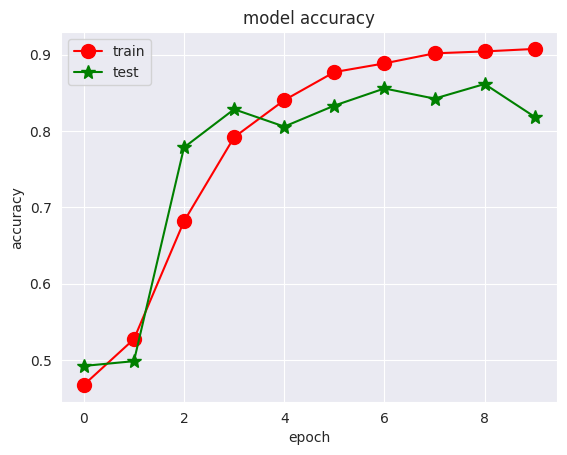

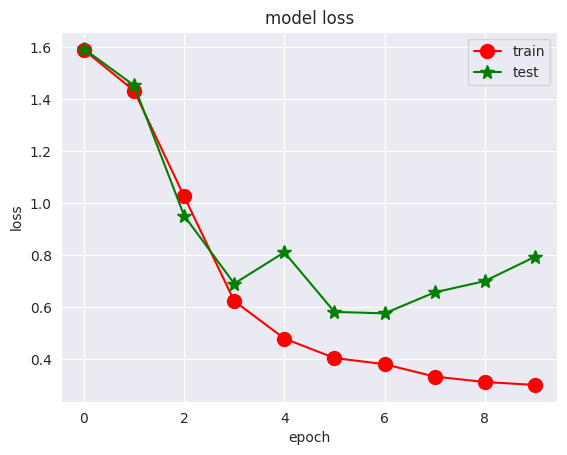

In [14]:
plot(cnn)

In [15]:
cnn.save('cnnABC.h5')
print('Model Saved!')

Model Saved!


In [16]:
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array

In [41]:
# load and prepare the image
def load_image(filename):
 # load the image
 img = load_img(filename, target_size=(224, 224))
 # convert to array
 img = img_to_array(img)
 # reshape into a single sample with 3 channels
 img = img.reshape(1, 224, 224, 3)
 # center pixel data
 img = img.astype('float32')
 img /= 255
 #img = img - [123.68, 116.779, 103.939]
 return img

def show_img(path):
  image = load_img(path)
  plt.imshow(image)

# load an image and predict the class
def run_example(path):
 # load the image
 img = load_image(path)
 # predict the class
 result = cnn.predict(img)
 print(result)
#  result_class = (result> 0.5).astype("int32")
 show_img(path)
 class_indices_array = np.array(list(train_data.class_indices.keys()))
 print("predicted label:",class_indices_array[np.argmax(result[0])])

#  if result_class  == 0:
#     print("Iron Man")
#  else:
#     print("Captan")

1/1 [==============================] - 0s 27ms/step
[[1.1079560e-10 1.0000000e+00 1.0000000e+00 0.0000000e+00 0.0000000e+00
  1.0000000e+00 8.8448024e-01 9.9999976e-01 6.9758932e-35 0.0000000e+00
  0.0000000e+00 1.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  9.9767989e-01 0.0000000e+00 2.0418402e-16 1.2399108e-09 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 5.2898337e-30]]
predicted label: B


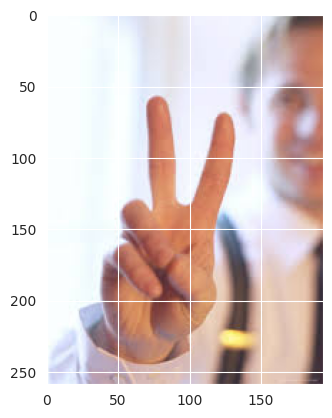

In [42]:
run_example('/content/1411545149-images12-o.jpg')

1/1 [==============================] - 0s 17ms/step
[[1.3111496e-23 8.9191699e-01 2.3912454e-02 2.4912144e-13 6.6315453e-04
  9.9992299e-01 2.0836172e-20 4.5516296e-27 9.9952602e-01 1.1542477e-13
  1.4615110e-15 1.0000000e+00 8.8890965e-06 9.9997842e-01 5.7105537e-10
  4.1422762e-05 4.6914137e-16 2.4515138e-11 4.5035861e-07 2.8203708e-24
  1.0603109e-32 1.1338195e-21 9.4573051e-01 9.9994302e-01]]
predicted label: M


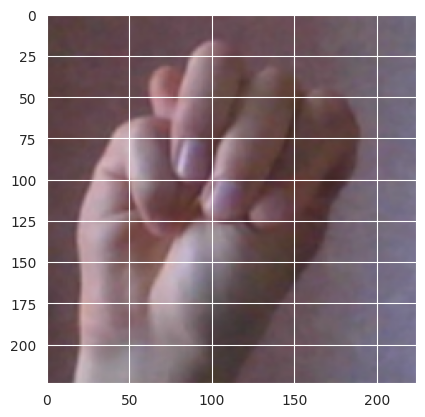

In [55]:
run_example('/content/input/Images/M/M_12.png')